In [890]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from eli5.sklearn import PermutationImportance
import eli5

In [696]:
fifa=pd.read_csv('C:/Users/Administrator/Desktop/fifa/data.csv')
fifa.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [697]:
fifa.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [698]:
def convert_M_num(x):
    l=[]
    x1=x.str.replace(r'€', '')
    for i in x1:
        if 'M' in i:
            l.append(float(i.replace(r'M',''))*1000000)
        elif 'K' in i:
            l.append(float(i.replace(r'K',''))*1000)
        else:
            l.append(int(i))
    return l

    

In [699]:
fifa['Value']=pd.Series(convert_M_num(fifa['Value']))

In [700]:
fifa["Value"].isnull().sum()

0

In [701]:
fifa['Wage']=pd.Series(convert_M_num(fifa['Wage']))

In [702]:
fifa.shape

(18207, 89)

In [703]:
fifa['Release Clause']=fifa['Release Clause'].fillna(method='bfill')

In [704]:
fifa['Release Clause'].isnull().sum()

0

In [705]:
fifa['Release Clause']=pd.Series(convert_M_num(fifa['Release Clause']))

In [706]:
def feet_to_m(x):
    lst=[]
    for i in range(0,18207):
        if (type(x[i])==float):
            lst.append('NaN')
        if (type(x[i])==str):
            height =x[i].split("'")
            feet = int(height[0])
            inches = int(height[1])
            tot_inches = feet*12 + inches
            meters = tot_inches * 0.0254
            lst.append(meters)
    return(lst)

In [707]:
fifa['Height_in_M']=pd.Series(feet_to_m(fifa['Height']))

In [708]:
fifa['Weight']=fifa['Weight'].str.replace(r'lbs','')

## Considering null as not taken loans, and now displaying the clubs giving most number of loans.

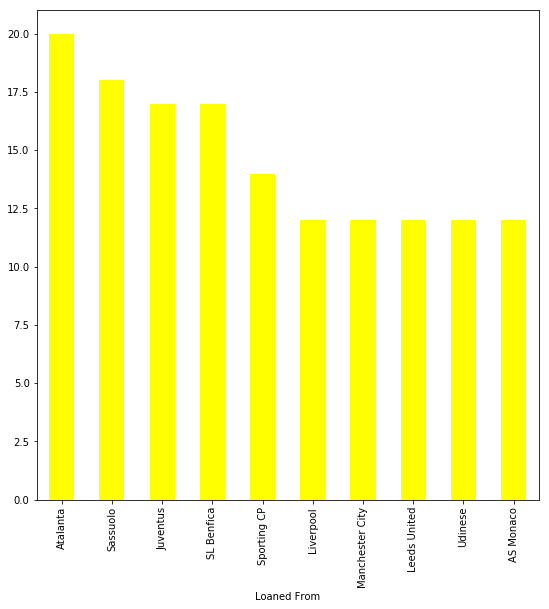

In [709]:
loan=fifa[fifa['Loaned From'].notnull()][['Name','Loaned From']]
loan.groupby('Loaned From')['Name'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='yellow')

## player whose age is between (18-22) and has potential to make a big name in football

In [710]:
c=list(range(18,22))
pot=fifa[(fifa['Age'].isin(c)) & (fifa['Overall']>80)][['Name','Value','Age','Overall']]
pot

,Name,Value,Age,Overall
25,K. Mbappé,81000000.0,19,88
155,O. Dembélé,40000000.0,21,83
156,Gabriel Jesus,41000000.0,21,83
226,M. de Ligt,27000000.0,18,82
228,Arthur,32500000.0,21,82
229,G. Donnarumma,29000000.0,19,82
234,Gonçalo Guedes,29000000.0,21,82
236,Malcom,31500000.0,21,82
319,M. Rashford,27000000.0,20,81
321,L. Bailey,26500000.0,20,81


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

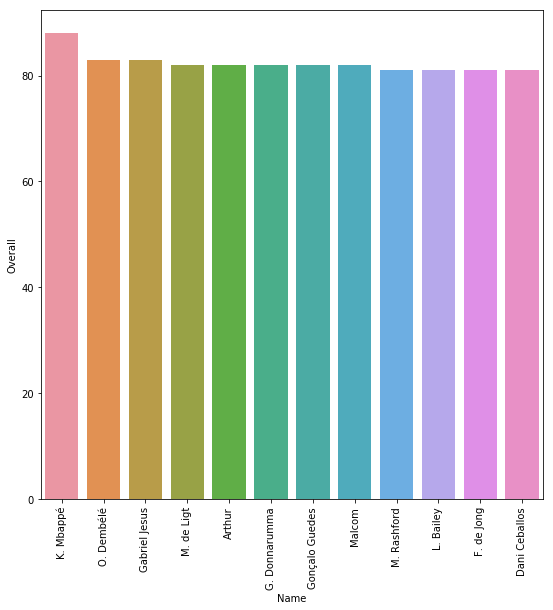

In [711]:
sns.barplot(x=pot['Name'],y=pot['Overall'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

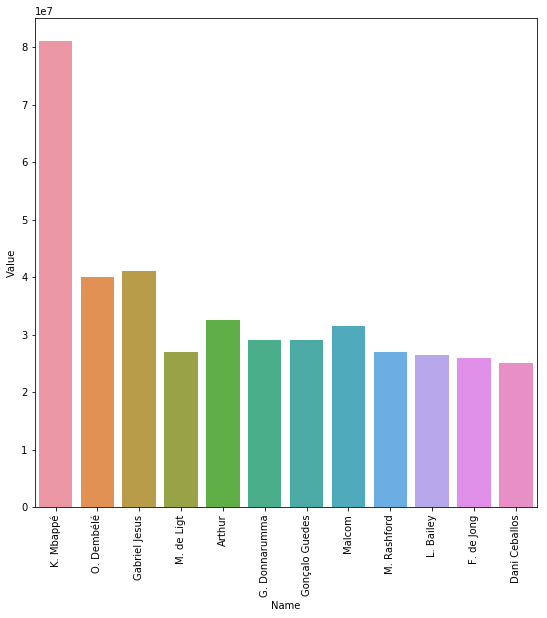

In [712]:
sns.barplot(x=pot['Name'],y=pot['Value'])
plt.xticks(rotation=90)

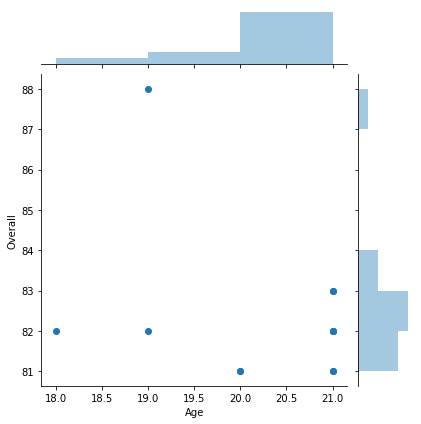

In [713]:
sns.jointplot(x=pot['Age'],y=pot['Overall'])

In [714]:
fifa.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_in_M
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1.7018
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.8796
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.7526
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.9304
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1.8034


## maximum player from a country and number of player playing for a particular club

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

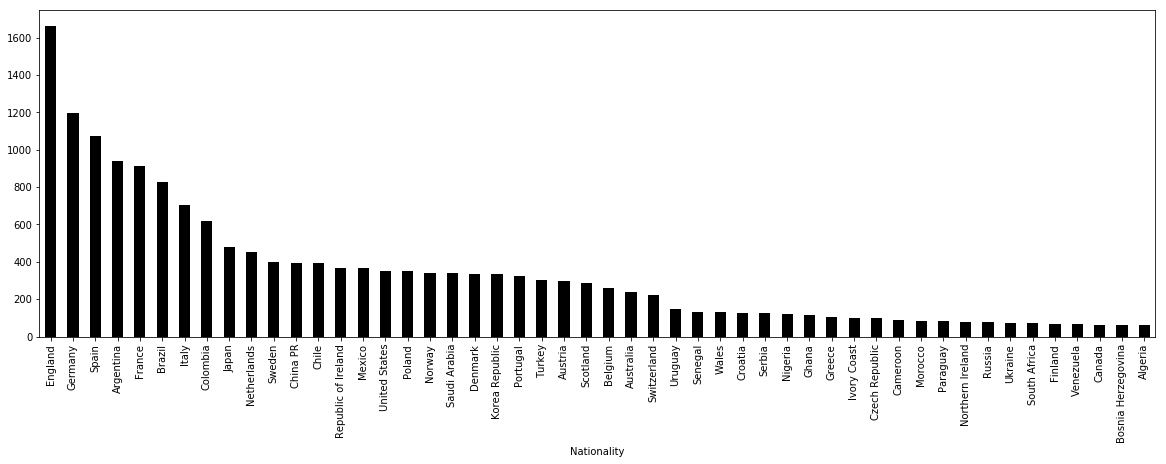

In [715]:
plt.figure(figsize=(20,6))
fifa.groupby('Nationality')['Name'].count().sort_values(ascending=False).head(50).plot(kind='bar',color='black')
plt.xticks(rotation=90)
#plt.figure(figsize=(10,10))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

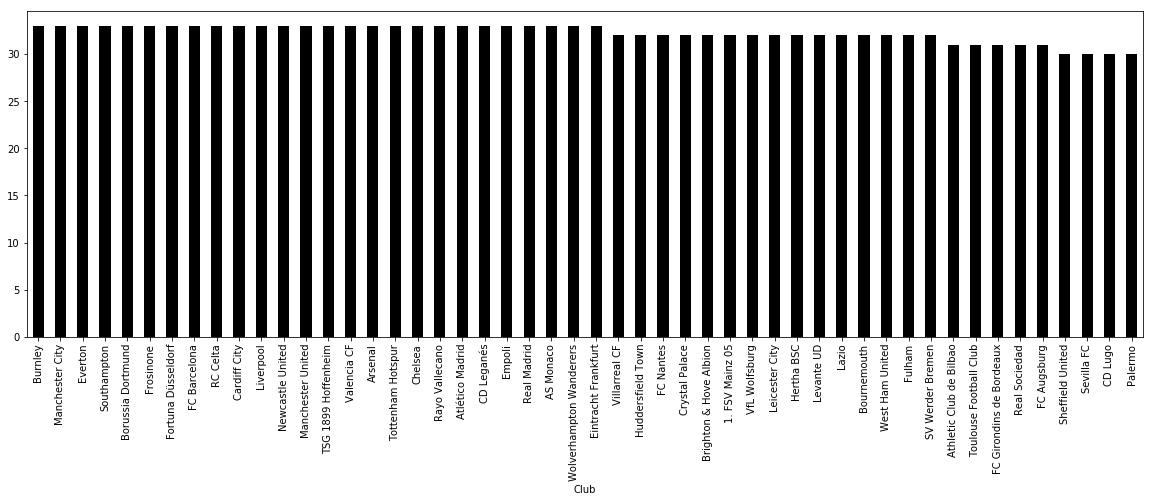

In [716]:
plt.figure(figsize=(20,6))
fifa.groupby('Club')['Name'].count().sort_values(ascending=False).head(50).plot(kind='bar',color='black')
plt.xticks(rotation=90)

In [717]:
fifa.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_in_M
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1.7018
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1.8796
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.7526
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.9304
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1.8034


## Top 20 Player By Value & Wage

<Figure size 720x720 with 0 Axes>

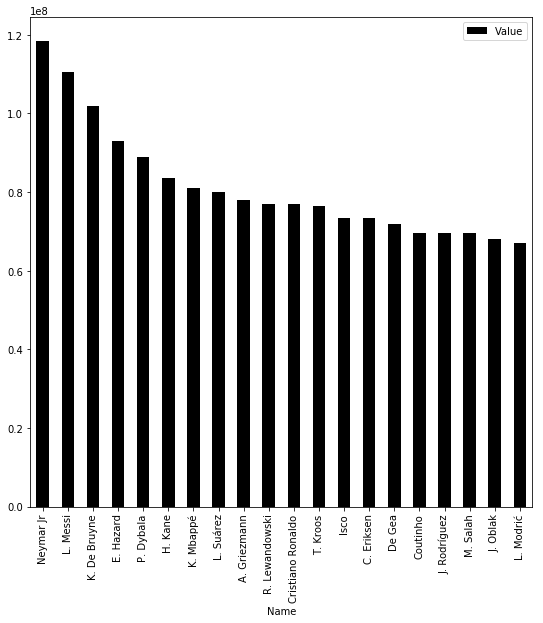

In [718]:
plt.figure(figsize=(10,10))
fifa[['Name','Value']].set_index('Name').sort_values(by='Value',ascending=False).head(20).plot(kind='bar',color='black')

<Figure size 720x720 with 0 Axes>

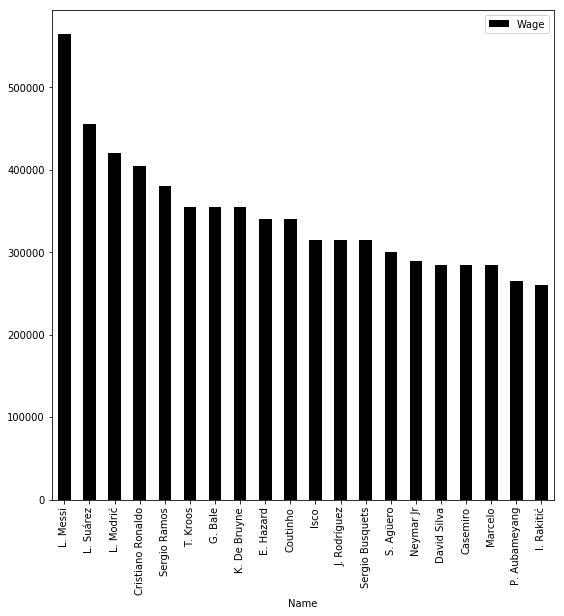

In [719]:
plt.figure(figsize=(10,10))
fifa[['Name','Wage']].set_index('Name').sort_values(by='Wage',ascending=False).head(20).plot(kind='bar',color='black')

## L.Paredes is the only player who has potential, age is also less than 25 and value is 0.

In [720]:
fifa[(fifa['Value']<25000) & (fifa['Overall']>=80) & (fifa['Potential']>=80) & (fifa['Age']<25)  ]

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_in_M
452,452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,NaN,...,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,25200000.0,1.8034


## Player playing with left foot or right foot

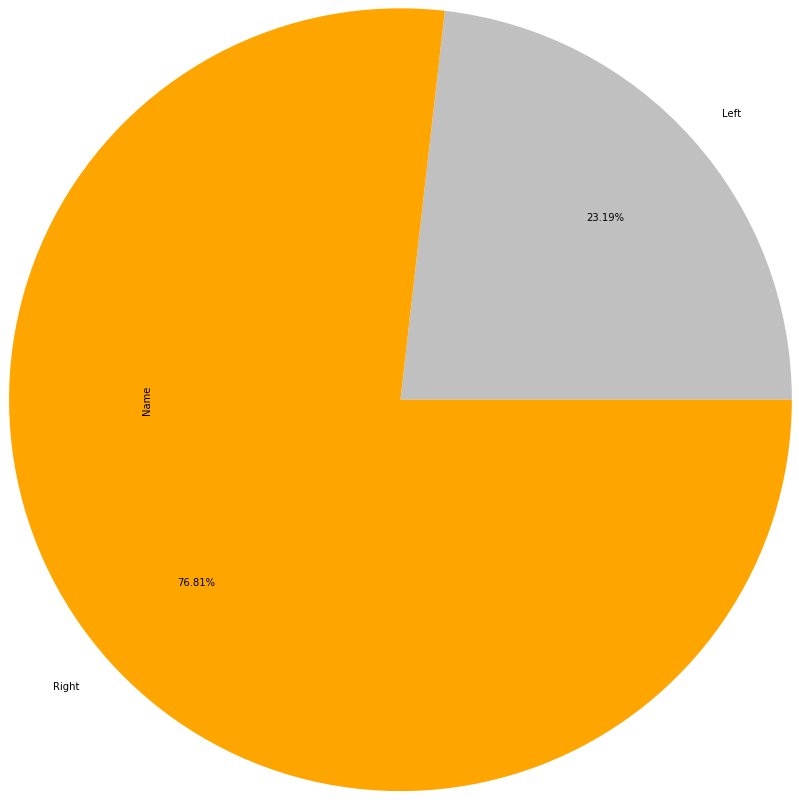

In [721]:
fifa.groupby('Preferred Foot')['Name'].count().plot(kind='pie',autopct='%.2f%%',pctdistance=0.7,colors=['silver','orange'],radius=2)

## Top 50 player who are with the same club for maximum time, taking present date as (05-01-2020).

In [722]:
from datetime import date,timedelta

currentDay = date.today()

requestedDay = pd.to_datetime(currentDay) - pd.to_datetime(fifa['Joined'],format='%b %d, %Y')

requestedDay

0       5668 days
1        546 days
2        887 days
3       3112 days
4       1591 days
5       2746 days
6       2715 days
7       2006 days
8       5272 days
9       2001 days
10      2016 days
11      2000 days
12      3443 days
13      3464 days
14      1270 days
15      1651 days
16      3477 days
17      1989 days
18      2016 days
19       516 days
20      4145 days
21      2366 days
22      3112 days
23      3085 days
24      5303 days
25       555 days
26       920 days
27      2371 days
28            NaT
29      3477 days
           ...   
18177   1127 days
18178    643 days
18179    555 days
18180   2381 days
18181   1101 days
18182    486 days
18183    508 days
18184    794 days
18185    683 days
18186   1275 days
18187    920 days
18188    920 days
18189    920 days
18190    555 days
18191    555 days
18192    736 days
18193    736 days
18194    555 days
18195    662 days
18196    920 days
18197    459 days
18198    423 days
18199    539 days
18200   1543 days
18201    6

In [723]:
No_days=(requestedDay).dt.days
fifa['days_in_club']=No_days


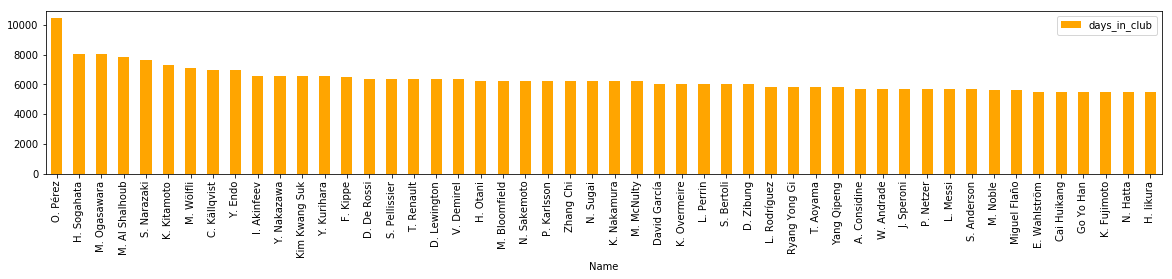

In [724]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
#plt.figure(figsize=(30,20))
fifa[['days_in_club','Name']].set_index('Name').sort_values(by='days_in_club',ascending=False).head(50).plot(kind='bar',color='orange')

## How many player has got international reputation,Skill Moves, as (1,2,3,4,5) & player names who got 5 reputation.

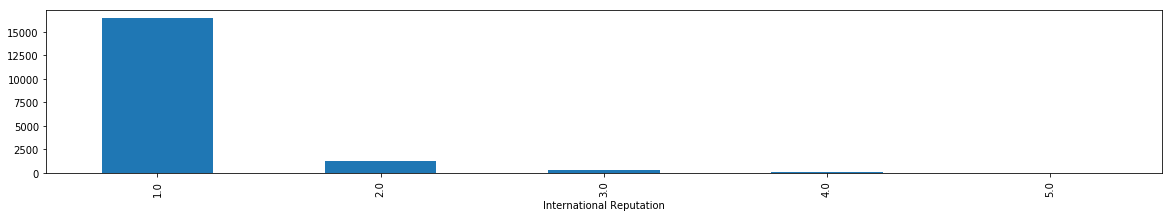

In [725]:
fifa.groupby('International Reputation')['ID'].count().plot(kind='bar')

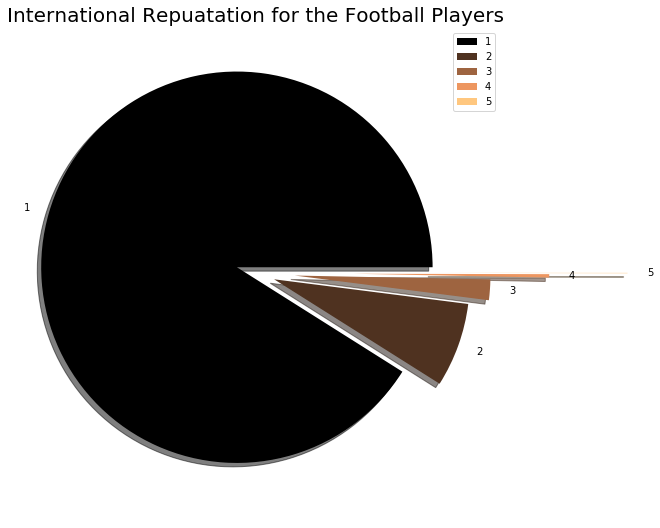

In [726]:
labels = ['1', '2', '3', '4', '5']
sizes = fifa['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

In [727]:
fifa[fifa['International Reputation']==5]['Name']

0               L. Messi
1      Cristiano Ronaldo
2              Neymar Jr
7              L. Suárez
22              M. Neuer
109       Z. Ibrahimović
Name: Name, dtype: object

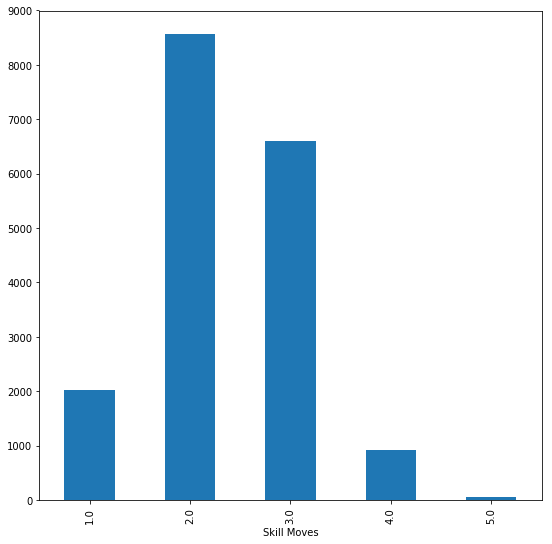

In [728]:
fifa.groupby('Skill Moves')['ID'].count().plot(kind='bar')

In [729]:
fifa[fifa['Skill Moves']==5]['Name']

1       Cristiano Ronaldo
2               Neymar Jr
25              K. Mbappé
32               Coutinho
35                Marcelo
45               P. Pogba
65          Douglas Costa
67                 Thiago
84              R. Mahrez
109        Z. Ibrahimović
124              M. Depay
129           J. Cuadrado
138           A. Di María
153              Quaresma
164              K. Coman
170             Q. Promes
221             F. Ribéry
233        Gelson Martins
243       F. Bernardeschi
270               W. Zaha
288                Marlos
370            X. Shaqiri
371             J. Corona
376        S. El Shaarawy
408                  Nani
480          V. Aboubakar
524             I. Piatti
545         Santi Cazorla
557           David Neres
559              A. Harit
582              F. Cervi
711           H. Ben Arfa
1004            J. Sancho
1132            L. Acosta
1143      Vinícius Júnior
1170       O. Abdulrahman
1195        C. Villanueva
1818           S. Larsson
1998        

## 20 Player who got maximum rating in special

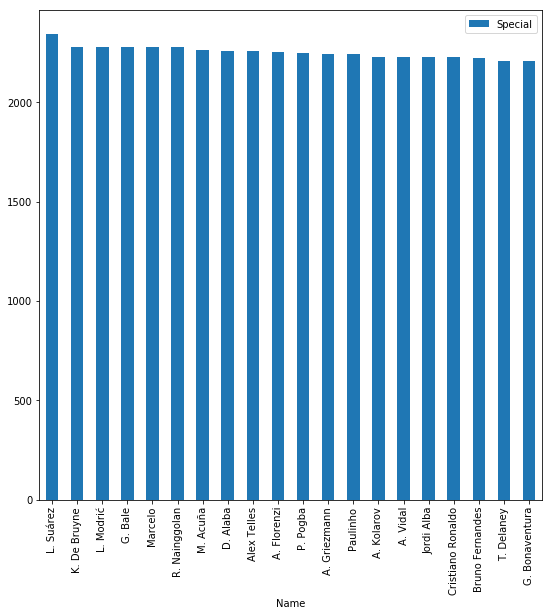

In [730]:
fifa[['Special','Name']].sort_values(by='Special',ascending=False).set_index('Name').head(20).plot(kind='bar')

## Indian players who is above average in overall

In [731]:
print(fifa['Overall'].mean())

66.23869940132916


In [732]:
ind=fifa[fifa['Nationality']=='India']
ind[(ind['Overall']>=66)]

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_in_M,days_in_club
8605,8605,190939,S. Chhetri,33,https://cdn.sofifa.org/players/4/19/190939.png,India,https://cdn.sofifa.org/flags/159.png,67,67,NaN,...,24.0,44.0,10.0,7.0,11.0,9.0,10.0,2000000.0,1.7018,NaN


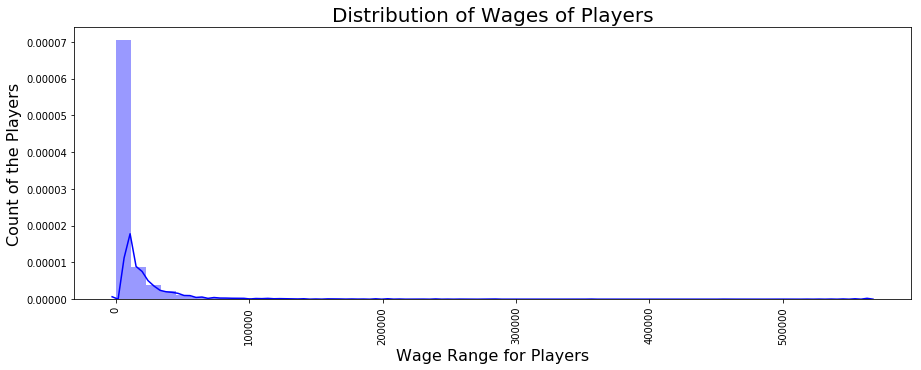

In [735]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(fifa['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

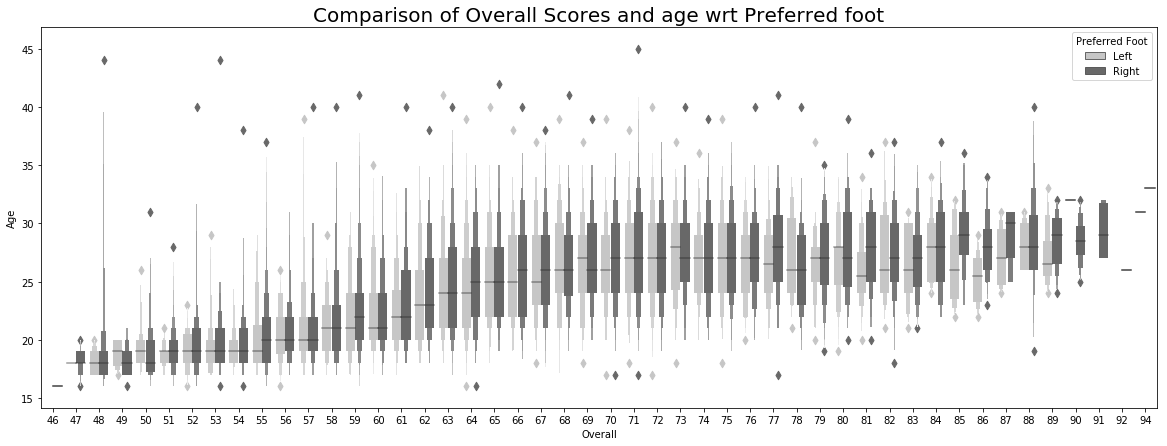

In [751]:

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(fifa['Overall'], fifa['Age'], hue = fifa['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

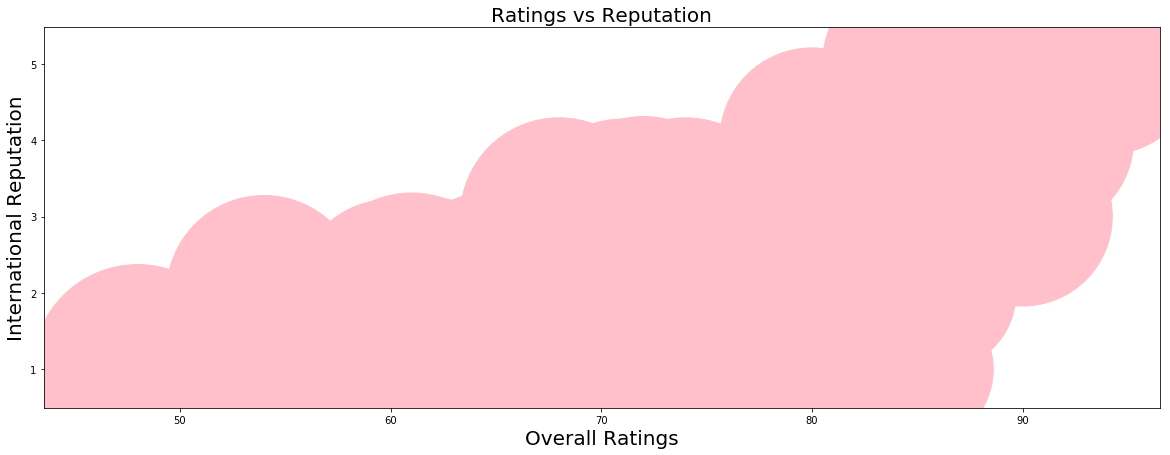

In [755]:
# bubble plot

plt.scatter(fifa['Overall'], fifa['International Reputation'], s = fifa['Age']*1000, c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('International Reputation', fontsize = 20)
plt.title('Ratings vs Reputation', fontweight = 20, fontsize = 20)
#plt.legend('Age', loc = 'upper left')
plt.show()

# best players per each position with their age, club, and nationality based on their overall scores


In [756]:
fifa.iloc[fifa.groupby(fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


# best players from each positions with their age, nationality, club based on their potential scores




In [758]:
fifa.iloc[fifa.groupby(fifa['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


In [780]:

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

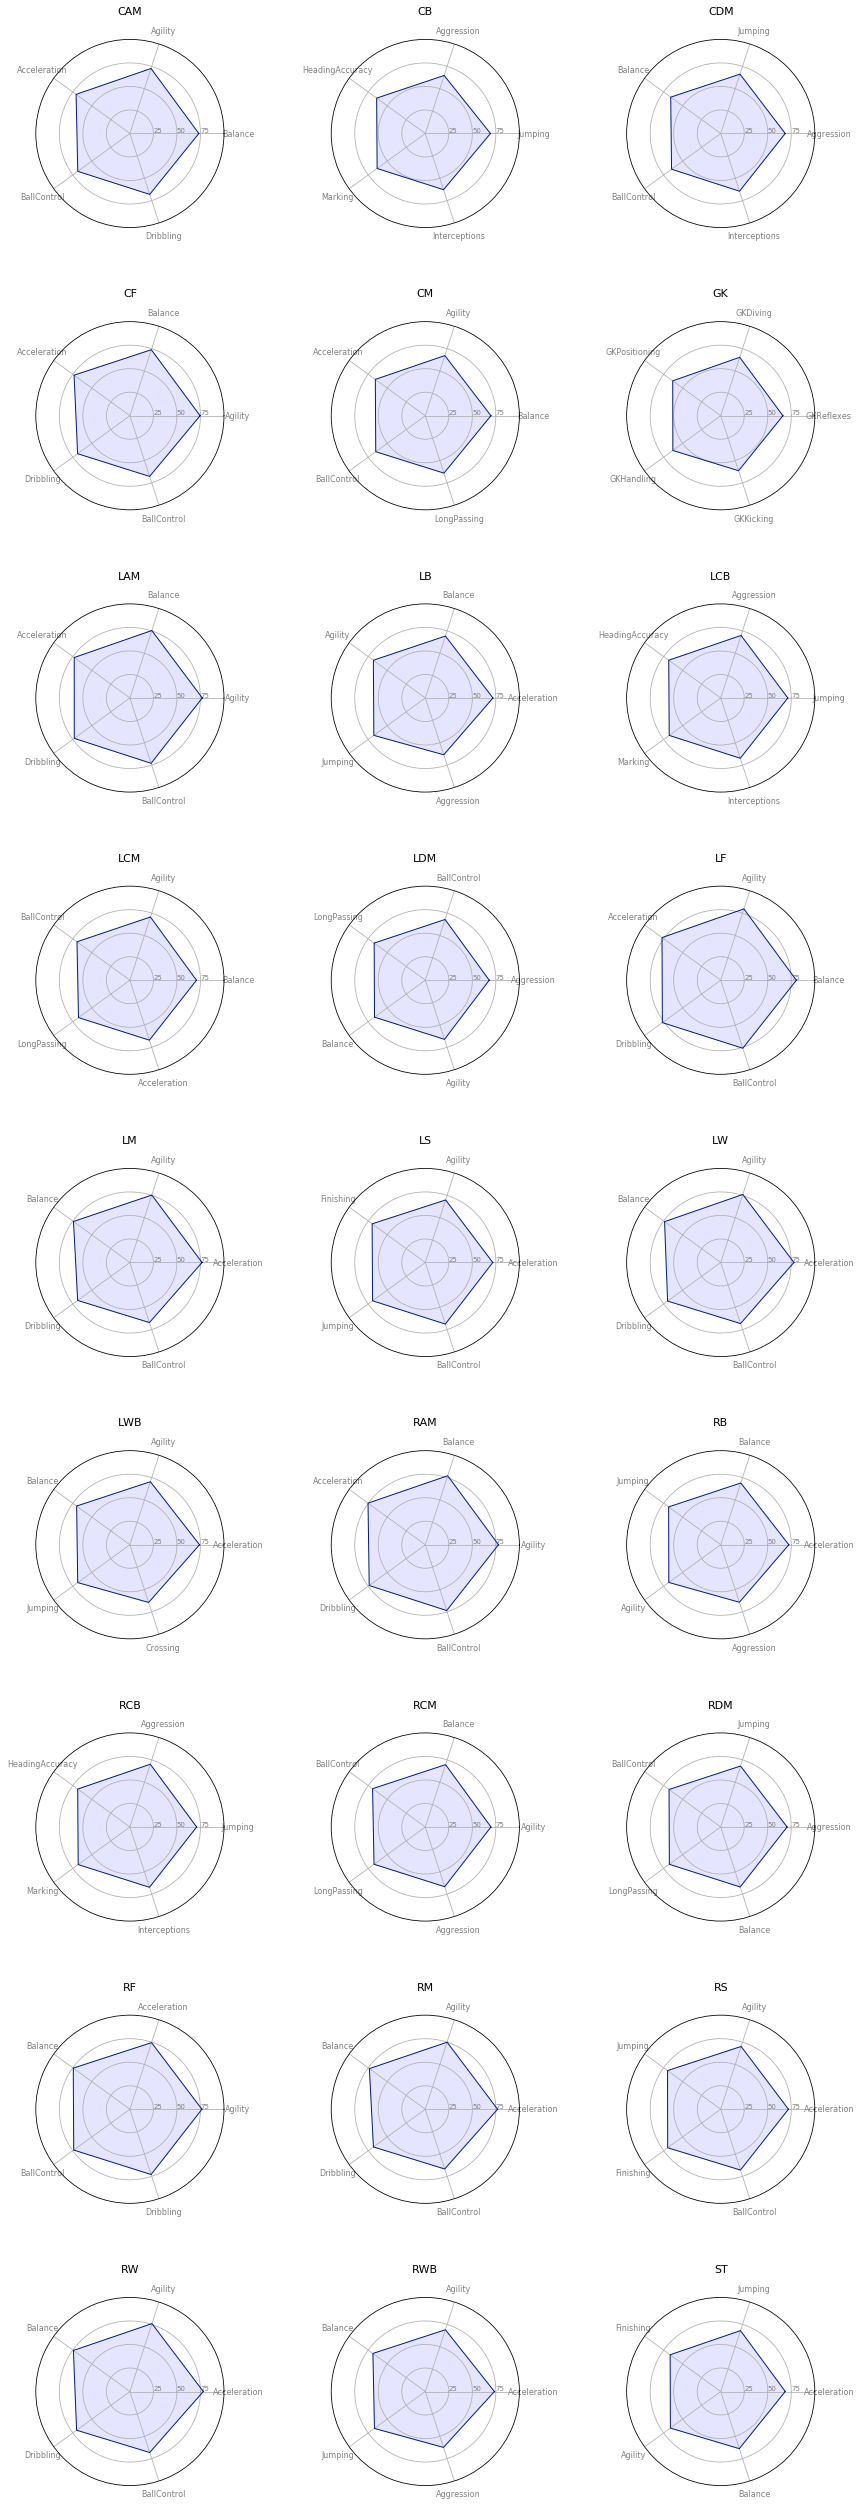

In [795]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
        
    # number of variable
    categories=top_features.keys()
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    #print(values)
    values += values[:1]
    #print(values)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 


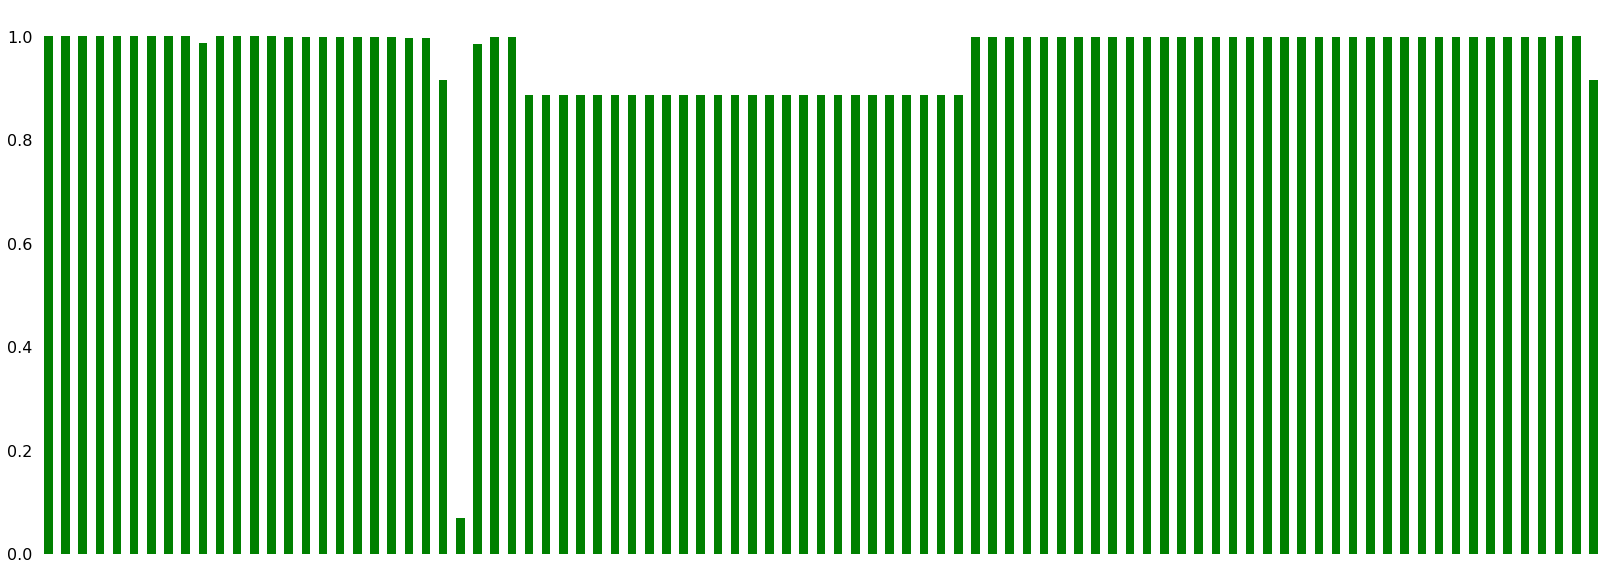

In [811]:
#To reduce the amount of data lets drop the coulmns which have very less data

msno.bar(fifa.sample( 18207 ),(28,10),color='green')
#Too less data in Loaned from so lets drop it


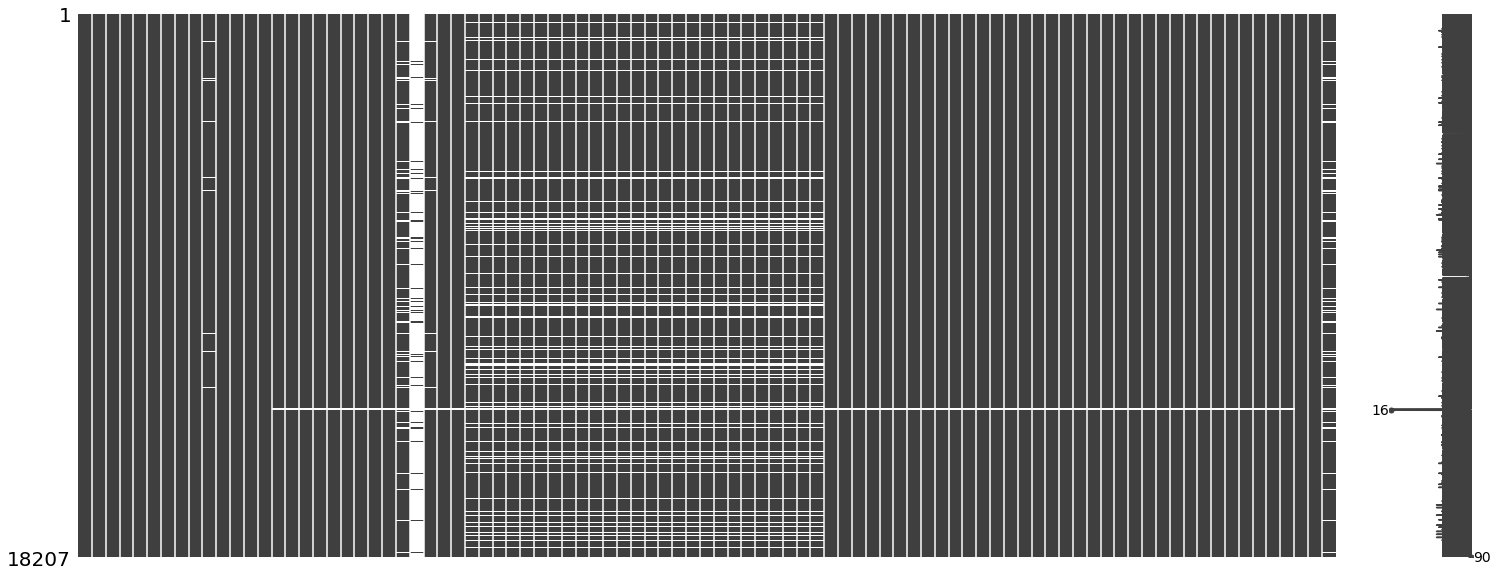

In [812]:
msno.matrix(fifa)

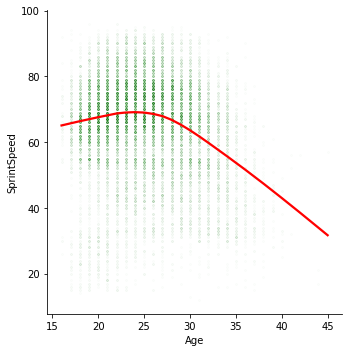

In [821]:
sns.lmplot(data = fifa, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
#As the age increases the sprint speed decreases

# Every Nations' Player and their Weights


In [769]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = fifa.loc[fifa['Nationality'].isin(some_countries)]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

TypeError: No loop matching the specified signature and casting
was found for ufunc add

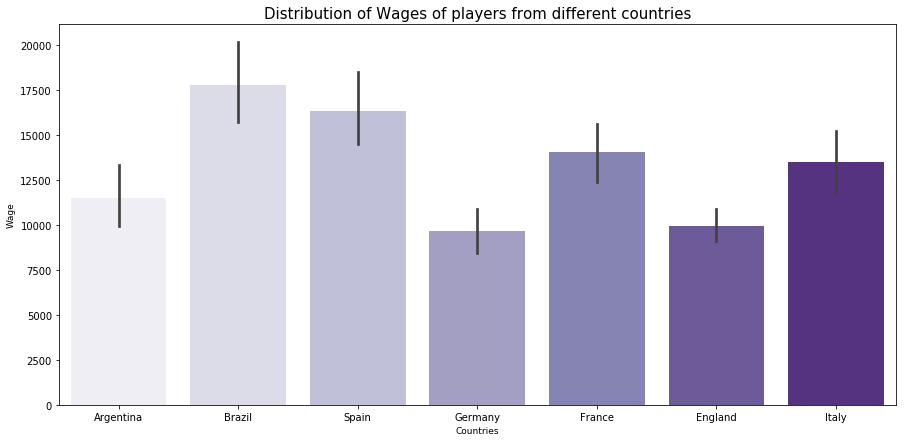

In [773]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = fifa.loc[fifa['Nationality'].isin(some_countries) & fifa['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

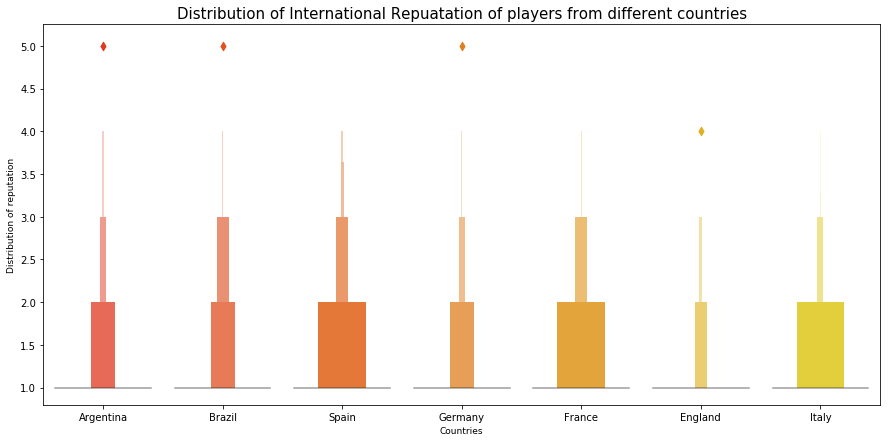

In [774]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = fifa.loc[fifa['Nationality'].isin(some_countries) & fifa['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [775]:
# finding 15 youngest Players from the dataset

youngest = fifa.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [776]:
# finding 15 eldest players from the dataset

eldest = fifa.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                           NaN           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

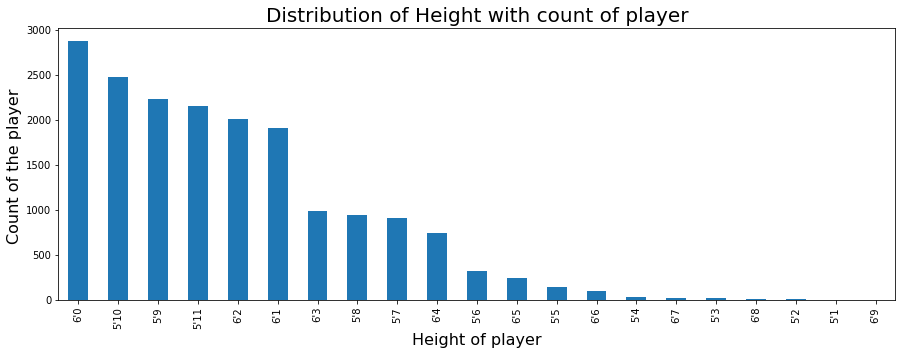

In [750]:
#plt.rcParams['figure.figsize'] = (15, 5)
fifa.groupby('Height')['ID'].count().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Height of player', fontsize = 16)
plt.ylabel('Count of the player ', fontsize = 16)
plt.title('Distribution of Height with count of player', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [734]:
fifa.groupby('ID')['Wage'].count()

ID
16        1
41        1
80        1
164       1
657       1
768       1
1179      1
2147      1
2335      1
2702      1
3281      1
3484      1
3665      1
5479      1
6826      1
7647      1
8205      1
9014      1
9833      1
10466     1
10884     1
10899     1
11381     1
11430     1
11800     1
11811     1
12940     1
13883     1
14907     1
16097     1
         ..
246452    1
246454    1
246455    1
246456    1
246457    1
246462    1
246464    1
246465    1
246466    1
246469    1
246548    1
246549    1
246550    1
246552    1
246565    1
246592    1
246593    1
246594    1
246599    1
246600    1
246601    1
246602    1
246603    1
246606    1
246608    1
246609    1
246613    1
246616    1
246617    1
246620    1
Name: Wage, Length: 18207, dtype: int64

## Plot between Height  & Weight 

In [733]:
a=fifa['Weight'].astype('float')
a=a.fillna(np.mean(fifa['Weight'].astype('float')))

In [478]:
b=fifa['Height_in_M'].astype('float')
b=b.fillna(np.mean(fifa['Height_in_M'].astype('float')))

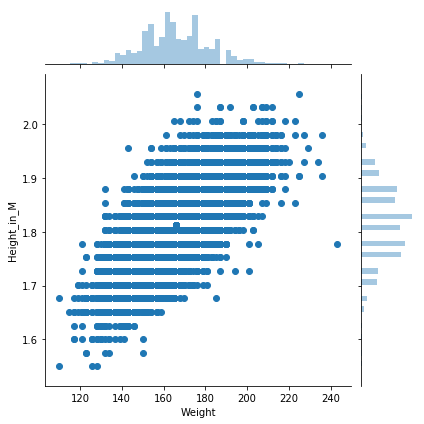

In [479]:
sns.jointplot(a,b)

## No of Player playing in a Particular position

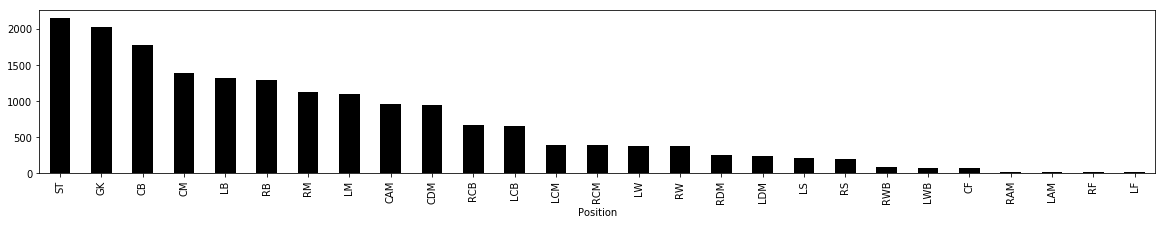

In [483]:
fifa.groupby('Position')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='black')

## plot between Finishing & Dribbling

In [487]:
c=fifa['Finishing']
c=c.fillna(np.mean(fifa['Finishing'].astype('float')))
d=fifa['Dribbling']
d=d.fillna(np.mean(fifa['Dribbling'].astype('float')))

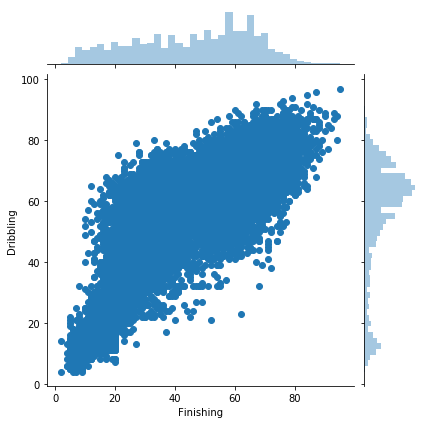

In [488]:
sns.jointplot(c,d)

## Plot Between Strength & stamina

In [490]:
e=fifa['Strength']
e=e.fillna(np.mean(fifa['Strength'].astype('float')))
f=fifa['Stamina']
f=f.fillna(np.mean(fifa['Stamina'].astype('float')))

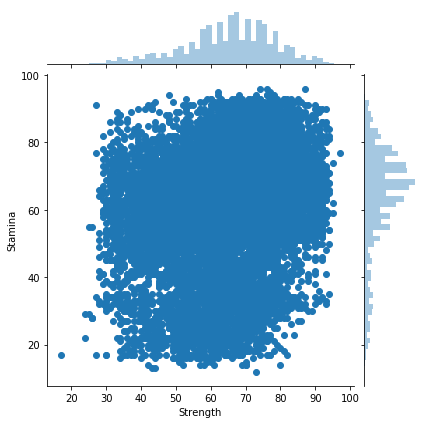

In [491]:
sns.jointplot(e,f)

## Plot between Longpass & short pass

In [494]:
g=fifa['ShortPassing']
g=g.fillna(np.mean(fifa['ShortPassing'].astype('float')))
h=fifa['LongPassing']
h=f.fillna(np.mean(fifa['LongPassing'].astype('float')))

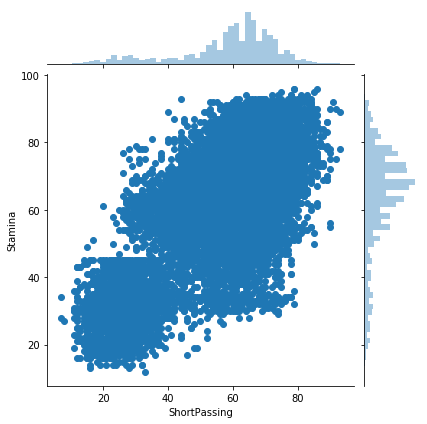

In [495]:
sns.jointplot(g,h)

In [496]:
## Plot between Accleration & SprintSpeed

In [497]:
i=fifa['Acceleration']
i=g.fillna(np.mean(fifa['Acceleration'].astype('float')))
j=fifa['SprintSpeed']
j=f.fillna(np.mean(fifa['SprintSpeed'].astype('float')))

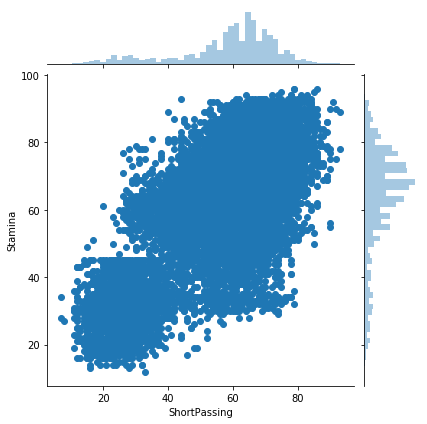

In [500]:
sns.jointplot(i,j)

In [595]:
fifa['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
5        172100000.0
6        137400000.0
7        164000000.0
8        104600000.0
9        144500000.0
10       127100000.0
11       156800000.0
12        90200000.0
13       111000000.0
14       121300000.0
15       153500000.0
16       160700000.0
17       165800000.0
18       123300000.0
19       113700000.0
20       105600000.0
21       111000000.0
22        62700000.0
23       119300000.0
24        44600000.0
25       166100000.0
26       137300000.0
27       126400000.0
28       105400000.0
29       105400000.0
            ...     
18177       193000.0
18178        94000.0
18179       119000.0
18180        78000.0
18181       109000.0
18182       101000.0
18183        78000.0
18184        78000.0
18185        88000.0
18186       167000.0
18187        66000.0
18188       143000.0
18189       125000.0
18190       165000.0
18191       119000.0
18192       119000.0
18193        

## Graphical Analysis

In [663]:
fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True)
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'], inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['Weight'].fillna('200lbs', inplace = True)
fifa['Contract Valid Until'].fillna(2019, inplace = True)
fifa['Height'].fillna("5'11", inplace = True)
fifa['Loaned From'].fillna('None', inplace = True)
fifa['Joined'].fillna('Jul 1, 2018', inplace = True)
fifa['Jersey Number'].fillna(8, inplace = True)
fifa['Body Type'].fillna('Normal', inplace = True)
fifa['Position'].fillna('ST', inplace = True)
fifa['Club'].fillna('No Club', inplace = True)
fifa['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa['Skill Moves'].fillna(fifa['Skill Moves'].median(), inplace = True)
fifa['Weak Foot'].fillna(3, inplace = True)
fifa['Preferred Foot'].fillna('Right', inplace = True)
fifa['International Reputation'].fillna(1, inplace = True)
fifa['Wage'].fillna('€200K', inplace = True)
fifa['Marking'].fillna(fifa['Marking'].mean(), inplace = True)
fifa['Aggression'].fillna(fifa['Aggression'].mean(), inplace = True)
fifa['Interceptions'].fillna(fifa['Interceptions'].mean(), inplace = True)
fifa['Positioning'].fillna(fifa['Positioning'].mean(), inplace = True)
fifa['Vision'].fillna(fifa['Vision'].mean(), inplace = True)
fifa['Composure'].fillna(fifa['Composure'].mean(), inplace = True)
fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['Acceleration'].fillna(fifa['Acceleration'].mean(), inplace = True)
fifa['SprintSpeed'].fillna(fifa['SprintSpeed'].mean(), inplace = True)
fifa['Agility'].fillna(fifa['Agility'].mean(), inplace = True)
fifa['Reactions'].fillna(fifa['Reactions'].mean(), inplace = True)
fifa['Balance'].fillna(fifa['Balance'].mean(), inplace = True)
fifa['Jumping'].fillna(fifa['Jumping'].mean(), inplace = True)
fifa['Stamina'].fillna(fifa['Stamina'].mean(), inplace = True)
fifa['Strength'].fillna(fifa['Strength'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'].mean(), inplace = True)
fifa['ShotPower'].fillna(fifa['ShotPower'].mean(), inplace = True)
fifa['LongShots'].fillna(fifa['LongShots'].mean(), inplace = True)
fifa['Penalties'].fillna(fifa['Penalties'].mean(), inplace = True)

In [667]:
def defending(fifa):    
    return int(round((fifa[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(fifa):
    return int(round((fifa[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(fifa):
    return int(round((fifa[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(fifa):
    return int(round((fifa[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(fifa):
    return int(round((fifa[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(fifa):
    return int(round((fifa[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(fifa):
    return int(round((fifa[['Potential', 'Overall']].mean()).mean()))

def shooting(fifa):
    return int(round((fifa[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [668]:
# renaming a column
fifa.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

fifa['Defending'] = fifa.apply(defending, axis = 1)
fifa['General'] = fifa.apply(general, axis = 1)
fifa['Mental'] = fifa.apply(mental, axis = 1)
fifa['Passing'] = fifa.apply(passing, axis = 1)
fifa['Mobility'] = fifa.apply(mobility, axis = 1)
fifa['Power'] = fifa.apply(power, axis = 1)
fifa['Rating'] = fifa.apply(rating, axis = 1)
fifa['Shooting'] = fifa.apply(shooting, axis = 1)

In [676]:
players =fifa[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]


In [685]:
players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [689]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data', boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [690]:
def graphPolar(id = 0):
    if 0 <= id < len(fifa.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')


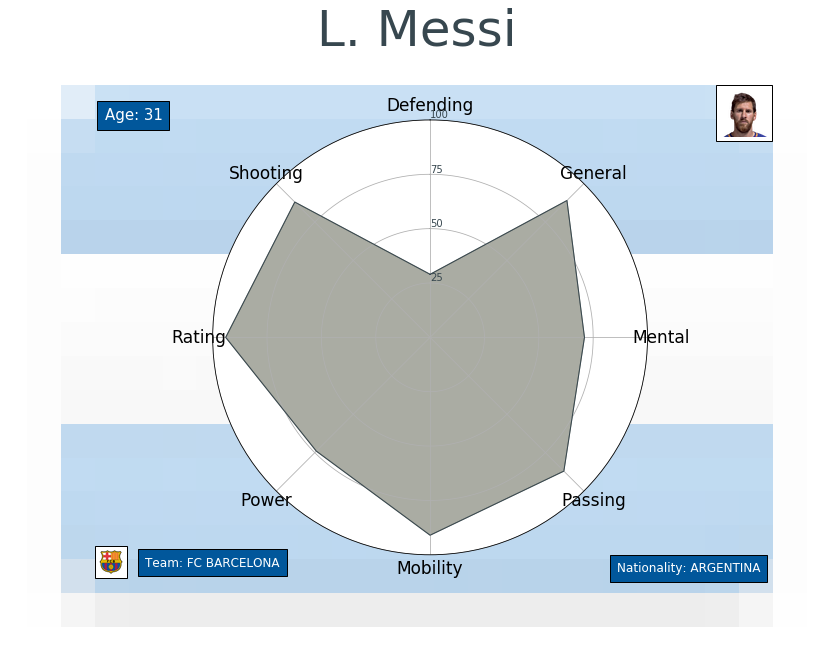

In [692]:
graphPolar(0)

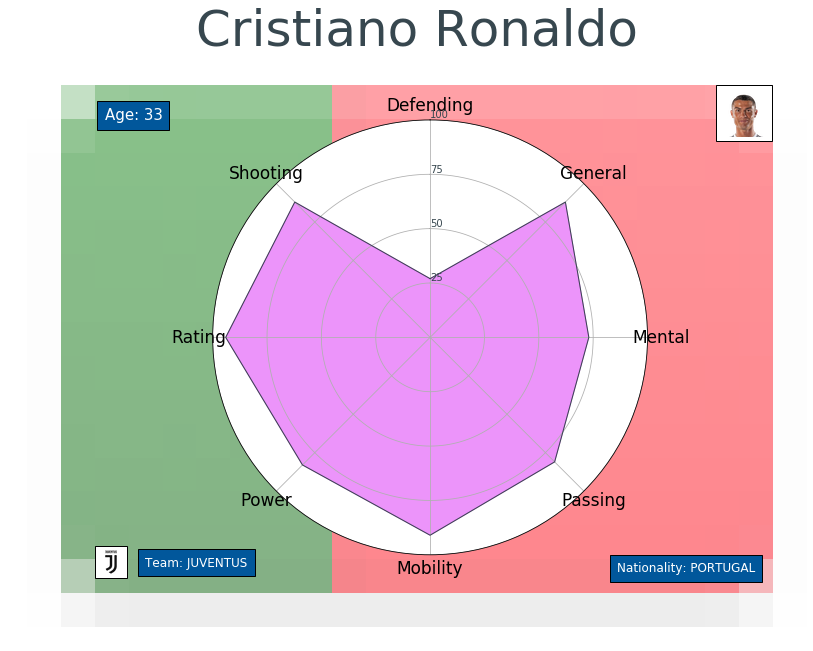

In [693]:
graphPolar(1)

## Modelling  for prediction

In [827]:
fifa.columns[28:54]
drop_cols = fifa.columns[28:54]
fifa = fifa.drop(drop_cols, axis = 1)
fifa = fifa.drop(['ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
fifa = fifa.dropna()
fifa.head()

KeyError: "['ID' 'Photo' 'Flag' 'Club Logo' 'Jersey Number' 'Joined' 'Special'\n 'Loaned From' 'Body Type' 'Release Clause' 'Weight' 'Height'\n 'Contract Valid Until' 'Wage' 'Value' 'Name' 'Club'] not found in axis"

In [839]:
fifa = fifa.dropna()
fifa.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [834]:
fifa=fifa.drop(['Height_in_M','days_in_club','index'],axis=1)

In [870]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
fifa['Preferred Foot']=x1.fit_transform(fifa['Preferred Foot'])
fifa['Real Face']=x1.fit_transform(fifa['Real Face'])
fifa['Work Rate']=x1.fit_transform(fifa['Work Rate'])
fifa['Position']=x1.fit_transform(fifa['Position'])
fifa.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,1,94,94,0,5.0,4.0,4.0,2,1,21,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,1,94,94,1,5.0,4.0,5.0,0,1,26,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,1,92,93,1,5.0,5.0,5.0,0,1,14,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,1,91,93,1,4.0,3.0,1.0,2,1,5,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,1,91,92,1,4.0,5.0,4.0,0,1,19,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [871]:
fifa['Position'].unique()

array([21, 26, 14,  5, 19, 11, 23, 18,  9,  1, 10,  0,  2, 13,  8, 22,  6,
       12,  7, 20, 24,  4, 17, 16,  3, 25, 15], dtype=int64)

In [868]:
ls2=[]
nation=fifa['Nationality'].value_counts()
nation_a=nation[nation>250].index.tolist()
for i in  fifa['Nationality']:
    if i in nation_a:
        ls2.append(1)
    else:
        ls2.append(0)
fifa['Nationality']=ls2
    

In [848]:
ls=[]
for i in fifa['Work Rate']:
    ls.append(i.split('/')[0])
fifa['Work Rate']=ls

In [873]:
y=fifa['Overall']
x=fifa.drop(['Overall'],axis=1)

In [876]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [877]:
import statsmodels.formula.api as smf
model=smf.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.857e+05
Date:                Sat, 11 Jan 2020   Prob (F-statistic):               0.00
Time:                        02:19:03   Log-Likelihood:                -35078.
No. Observations:               14517   AIC:                         7.019e+04
Df Residuals:                   14499   BIC:                         7.033e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.6617      0.005    132.096      0.000       0.652       0.672
Nationality                 -0.9089      0.054    -16.718      0.000      -1.015      -0.802
Potential                    0.5711      0.003    189.567      0.000       0.565       0.577
Preferred Foot              -0.3582      0.054     -6.588      0.000      -0.465      -0.252
International Reputation     1.0420      0.070     14.887      0.000       0.905       1.179
Weak Foot                   -0.0458      0.037     -1.248      0.212      -0.118       0.026
Skill Moves                  1.9686      0.048     41.008      0.000       1.874       2.063
Work Rate                   -0.5202      0.027    -19.415      0.000      -0.573      -0.468
Real Face                    1.7709      0.089     19.941      0.000       1.597       1.945
Position                     0.0439      0.003     14.080      0.000       0.038       0.050
Marking                      0.0405      0.003     14.435      0.000       0.035       0.046
StandingTackle               0.0630      0.005     12.588      0.000       0.053       0.073
SlidingTackle               -0.0434      0.005     -9.031      0.000      -0.053      -0.034
GKDiving                     0.0207      0.007      3.051      0.002       0.007       0.034
GKHandling                   0.0083      0.007      1.225      0.221      -0.005       0.022
GKKicking                   -0.0111      0.006     -1.763      0.078      -0.024       0.001
GKPositioning                0.0148      0.007      2.217      0.027       0.002       0.028
GKReflexes                   0.0520      0.007      7.743      0.000       0.039       0.065
==============================================================================
Omnibus:                      498.959   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.310
Skew:                          -0.438   Prob(JB):                    3.92e-124
Kurtosis:                       3.413   Cond. No.                         517.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [878]:
reg=LinearRegression()
reg1=reg.fit(x_train,y_train)
print('Coefficicents:',reg1.coef_)
print('intercept:',reg1.intercept_)

Coefficicents: [ 0.84644186 -0.40157529  0.78431067 -0.0999184   0.27300091  0.1979648
  1.71519681 -0.2122455   0.66424867  0.05495313  0.03024612  0.04729704
 -0.02237886  0.02463986  0.00811682 -0.00184523 -0.00346926  0.04773985]
intercept: -19.80943164494265


In [879]:
y_pred=reg1.predict(x_test)
y_pred

array([52.58389449, 66.77427281, 62.48888161, ..., 64.19651172,
       66.8681372 , 71.84250549])

In [880]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print('RMSE=',rmse)
print('R2 Score',r2)

RMSE= 2.403935763728191
R2 Score 0.8776372282789222


In [891]:
perm = PermutationImportance(reg1, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.9958 ± 0.0449,Potential
0.6413 ± 0.0187,Age
0.0699 ± 0.0056,Skill Moves
0.0419 ± 0.0027,StandingTackle
0.0316 ± 0.0012,GKReflexes
0.0139 ± 0.0011,Marking
0.0111 ± 0.0022,SlidingTackle
0.0100 ± 0.0009,Position
0.0079 ± 0.0014,GKDiving
0.0018 ± 0.0004,Work Rate


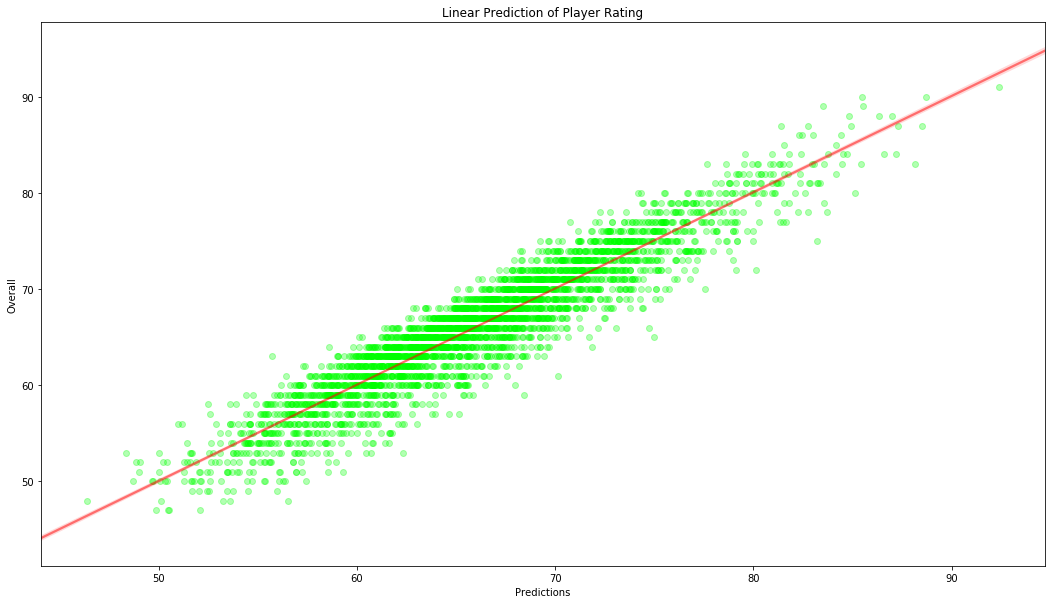

In [892]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(y_pred,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()

In [883]:
!pip install eli5

  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate
